# Final Project Sample Code

In [1]:
#Install Libraries

#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install scipy

In [1]:
#Import Libraries

import csv
import random
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch


%matplotlib inline

# What does our Data look like?

In [2]:
df = pd.read_csv('metadata.csv')
df.info(verbose=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45774 entries, 0 to 45773
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cord_uid                     45774 non-null  object 
 1   sha                          31753 non-null  object 
 2   source_x                     45774 non-null  object 
 3   title                        45617 non-null  object 
 4   doi                          42440 non-null  object 
 5   pmcid                        26243 non-null  object 
 6   pubmed_id                    34641 non-null  float64
 7   license                      45774 non-null  object 
 8   abstract                     37913 non-null  object 
 9   publish_time                 45765 non-null  object 
 10  authors                      43774 non-null  object 
 11  journal                      41707 non-null  object 
 12  Microsoft Academic Paper ID  964 non-null    float64
 13  WHO #Covidence  

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [3]:
import numpy as np 
import pandas as pd 

# load the meta data from the CSV file and extract out fields that will be useful to our application

df = df[['title','abstract','authors','publish_time']]
df = df.drop_duplicates(subset='abstract', keep="first")
df=df.dropna()
df["abstract"] = df["abstract"].str.lower()
df.head()

,title,abstract,authors,publish_time
0,SIANN: Strain Identification by Alignment to N...,next-generation sequencing is increasingly bei...,Samuel Minot; Stephen D Turner; Krista L Ternu...,2014-01-10
1,Spatial epidemiology of networked metapopulati...,an emerging disease is one infectious epidemic...,Lin WANG; Xiang Li,2014-06-04
2,Sequencing of the human IG light chain loci fr...,germline variation at immunoglobulin gene (ig)...,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,2014-07-03
3,Bayesian mixture analysis for metagenomic comm...,deep sequencing of clinical samples is now an ...,Sofia Morfopoulou; Vincent Plagnol,2014-07-25
4,Mapping a viral phylogeny onto outbreak trees ...,developing methods to reconstruct transmission...,Stephen P Velsko; Jonathan E Allen,2014-11-11


# Looking into COVID-19 Symptoms

In [1]:
from IPython.display import Image
#We want to study the symptoms of COVID-19 and how they manifest

#Lets do some research for popular virus symptoms:
#Image(filename='onlinesymptoms.png')
Image(url='http://analytics.romanko.ca/images/onlinesymptoms.png')

In [4]:
#Define your list of symptoms from above

symptoms = ['cold', 'fever', 'cough', 'rhinitis', 'sore throat', 'hoarseness', 'bronchitis', 'bronchiolitis', 'pneumonia', 'shortness of breath']
#shortness of breath = dyspnoea
#breathlessness

# Lets visualize which symptoms we find in our data

{'cold': 0, 'fever': 0, 'cough': 0, 'rhinitis': 0, 'sore throat': 0, 'hoarseness': 0, 'bronchitis': 0, 'bronchiolitis': 0, 'pneumonia': 0, 'shortness of breath': 0}


2020-04-01 23:50:45,575 [19768] WARNING  py.warnings:110: [JupyterRequire] C:\Users\OLEKSANDRRomanko\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)



{'cold': 413, 'fever': 1742, 'cough': 602, 'rhinitis': 74, 'sore throat': 102, 'hoarseness': 7, 'bronchitis': 804, 'bronchiolitis': 256, 'pneumonia': 2180, 'shortness of breath': 68}


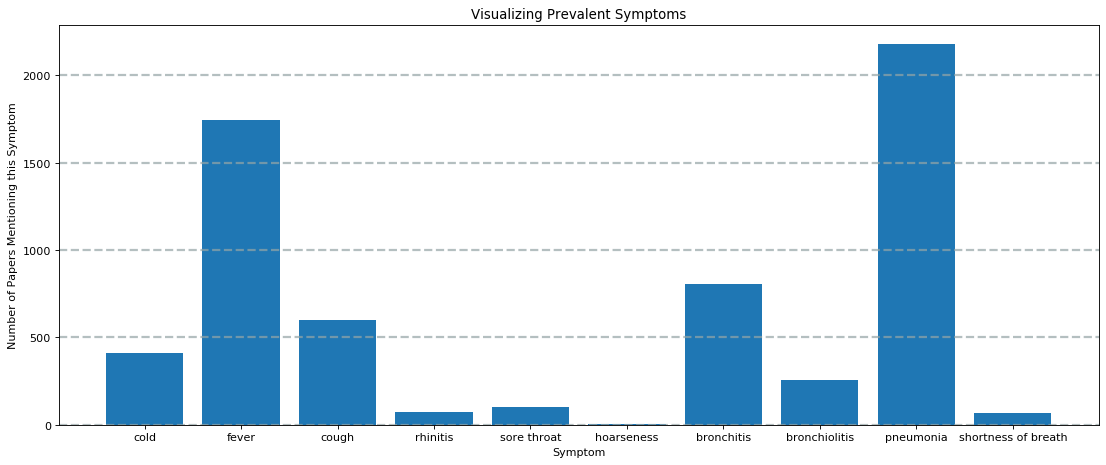

In [5]:
#Lets do some preliminary exploratory data analysis

symptom_count = dict((symptom,0) for symptom in symptoms)

print(symptom_count)

for symptom in symptom_count:
    for abstract in df['abstract']:
        if str(symptom) in abstract:
            symptom_count[symptom] += 1


print(symptom_count)

loc = np.arange(len(symptom_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(symptom_count.keys(),symptom_count.values())
ax.set_xticks(loc, tuple(symptoms))

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this Symptom')
ax.set_xlabel('Symptom')
ax.set_title('Visualizing Prevalent Symptoms')
plt.show()


In [6]:
#Hoarseness doesn't seem to be very important, lets pop it

symptoms.pop(5)
print(symptoms)

['cold', 'fever', 'cough', 'rhinitis', 'sore throat', 'bronchitis', 'bronchiolitis', 'pneumonia', 'shortness of breath']


# Lets define our distance matrix

In [12]:
#Define the metric that will be used to define the "distance" metric used in the heirarchical clustering algorithm
symptom_dist = np.zeros((len(symptoms),len(symptoms)), dtype=float)
print(symptom_dist)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
df_symptoms = pd.DataFrame(symptom_dist, columns=symptoms, index=symptoms)
df_symptoms

,cold,fever,cough,rhinitis,sore throat,bronchitis,bronchiolitis,pneumonia,shortness of breath
cold,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fever,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cough,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rhinitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sore throat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bronchitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bronchiolitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shortness of breath,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Helper function that will calculate the distance

def cumulative_dist(symptom1, symptom2, df):
    cum_sum = 0
    number_of_papers = 0
    if symptom1 == symptom2: return 0
    
    for abstract in df['abstract']:
        if ((symptom1 in abstract) and (symptom2 in abstract)):
            number_of_papers += 1
            cum_sum -= 1
        elif (((symptom1 in abstract) and (symptom2 not in abstract)) or ((symptom1 not in abstract) and (symptom2 in abstract))):
            number_of_papers += 1
            cum_sum += 1
    return cum_sum/number_of_papers


#Populate Matrix of symptom distances by mining the text of the papers found in the database and using the distance rule as

#For a symptom A and B mentioned in a paper together the distanceA_B += 1 
# or distanceA_B -= 1 if they are not mentioned together

symptom_dist = np.zeros((len(symptoms),len(symptoms)),float)
symptom_dist1 = np.zeros((len(symptoms),len(symptoms)),float)
#print(symptom_dist)
#print()
for i in range(len(symptoms)):
    for j in range(len(symptoms)):
        symptom_dist[i][j] = cumulative_dist(symptoms[i],symptoms[j], df)
        symptom_dist1[i][j] = cumulative_dist(symptoms[i],symptoms[j], df)**6

In [9]:
df_symptoms = pd.DataFrame(symptom_dist1, columns=symptoms, index=symptoms)
print('Our distance matrix looks like this:')   
df_symptoms

Our distance matrix looks like this:


,cold,fever,cough,rhinitis,sore throat,bronchitis,bronchiolitis,pneumonia,shortness of breath
cold,0.000000,0.837153,0.723202,0.815592,0.784697,0.832843,0.641967,0.801928,1.000000
fever,0.837153,0.000000,0.073878,0.935367,0.648725,0.921999,0.835776,0.321655,0.709247
cough,0.723202,0.073878,0.000000,0.786603,0.262144,0.758180,0.711776,0.343106,0.348073
rhinitis,0.815592,0.935367,0.786603,0.000000,0.933358,0.972914,0.797366,0.952847,1.000000
sore throat,0.784697,0.648725,0.262144,0.933358,0.000000,0.986813,0.966854,0.874228,0.583434
bronchitis,0.832843,0.921999,0.758180,0.972914,0.986813,0.000000,0.870226,0.777685,0.986302
bronchiolitis,0.641967,0.835776,0.711776,0.797366,0.966854,0.870226,0.000000,0.564183,1.000000
pneumonia,0.801928,0.321655,0.343106,0.952847,0.874228,0.777685,0.564183,0.000000,0.848280
shortness of breath,1.000000,0.709247,0.348073,1.000000,0.583434,0.986302,1.000000,0.848280,0.000000


# Perform Hierarchical Clustering using our distance matrix

In [10]:
# Distance was magnified prior to Hierarchical Clustering
Y = sch.linkage(symptom_dist1, method='centroid')

2020-04-01 23:51:43,190 [19768] WARNING  py.warnings:110: [JupyterRequire] C:\Users\OLEKSANDRRomanko\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """



Text(0.5, 1.0, 'Dendrogram Displaying COVID-19 Symptom Clusters')

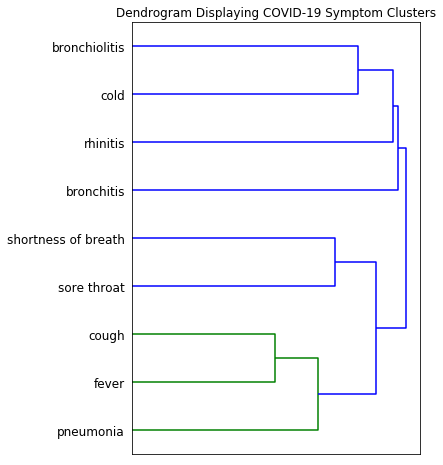

In [11]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get the dendrogram
Z1 = sch.dendrogram(Y, orientation='right')

ax1.set_xticks([])
labels = df_symptoms.columns[Z1['leaves']]
ax1.set_yticklabels(labels)
ax1.set_title("Dendrogram Displaying COVID-19 Symptom Clusters")
#plt.savefig('COVID_clustering.png', format='png', bbox_inches='tight', dpi=600)

In [2]:
#Image(filename='symptoms.png')
Image(url='http://analytics.romanko.ca/images/symptoms.png')

# Using the insights derived from your model, suggest how action can be taken against COVID-19